In [ ]:
import nltk
# Download required NLTK corpora (stopwords, tokenizer, lemmatizer)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
print('NLTK resources checked/downloaded')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

**Full pipeline: Steps 1–6 — EDA, Preprocessing, Feature Engineering, Modeling, Tuning, Evaluation, Save/Load**

Dataset shape: (24783, 7)

Columns: ['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither', 'class', 'tweet']

Missing values per column:
 Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64


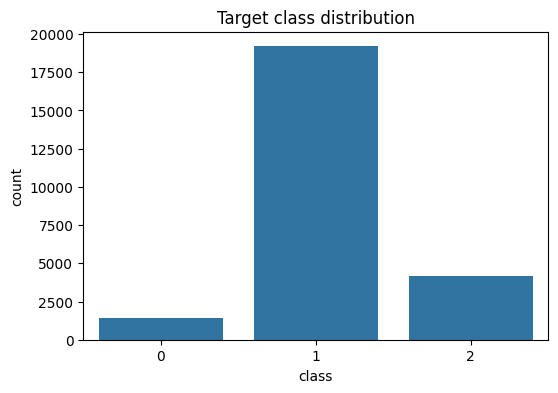


Numeric columns: ['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither', 'class']


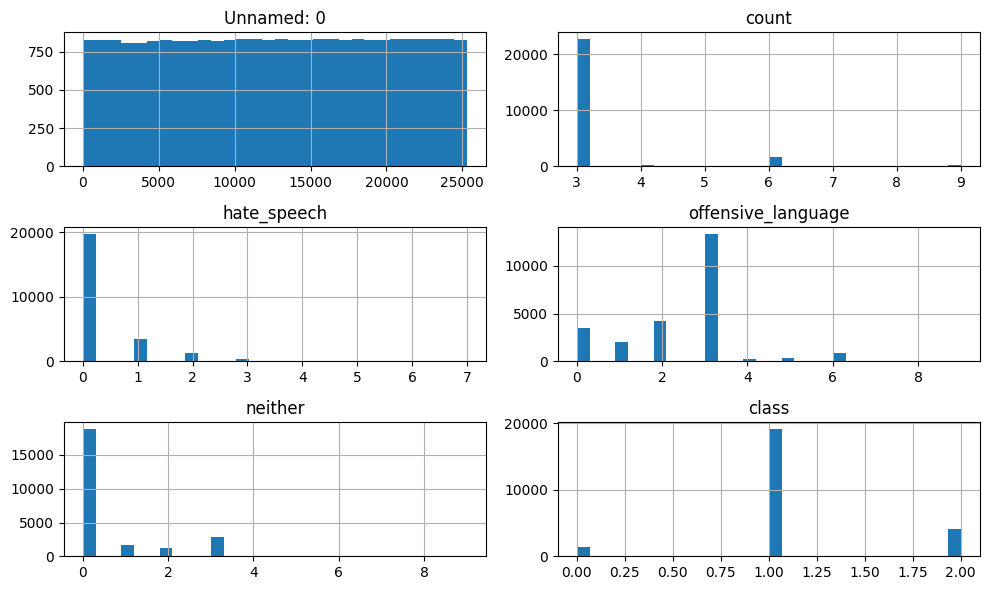

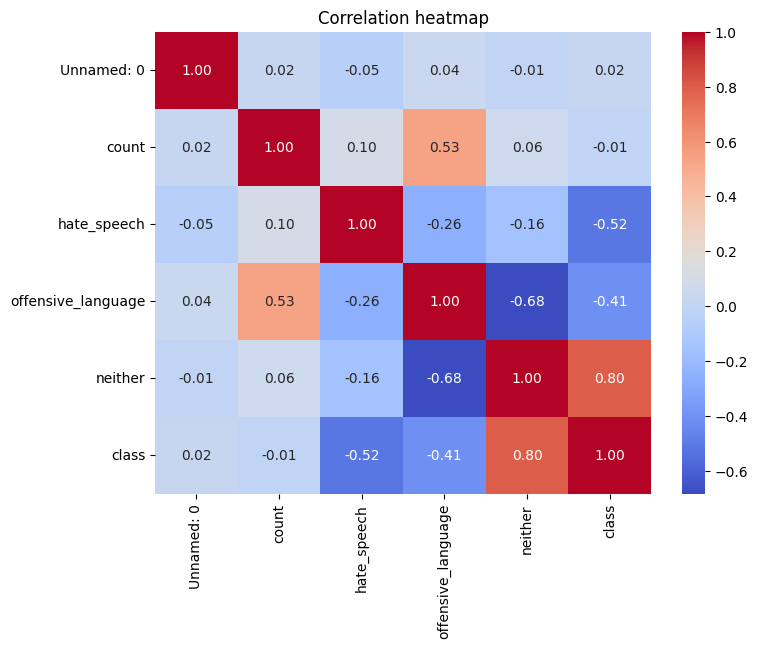

Rows dropped (missing tweet/class): 0
Dropping columns (potential leakage): ['Unnamed: 0', 'hate_speech', 'offensive_language', 'neither']
Numeric features scaled using StandardScaler
Saved cleaned dataset to data/cleaned_labeled_data.csv


In [ ]:
# Step 1: Data Exploration & Preprocessing (EDA)
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Load dataset
df = pd.read_csv('data/labeled_data.csv')
# Basic info (re-run to ensure df exists)
print('Dataset shape:', df.shape)
print('\nColumns:', df.columns.tolist())
print('\nMissing values per column:\n', df.isnull().sum())

# Target distribution
plt.figure(figsize=(6,4))
sns.countplot(x='class', data=df)
plt.title('Target class distribution')
plt.xlabel('class')
plt.show()

# Numeric feature histograms
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print('\nNumeric columns:', numeric_cols)
if len(numeric_cols) > 0:
    df[numeric_cols].hist(figsize=(10,6), bins=30)
    plt.tight_layout()
    plt.show()

# Correlation heatmap for numeric columns
if len(numeric_cols) > 1:
    corr = df[numeric_cols].corr()
    plt.figure(figsize=(8,6))
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Correlation heatmap')
    plt.show()

# Handle missing values: drop rows with missing `tweet` or `class`, fill numeric with median
before = len(df)
df = df.dropna(subset=['tweet','class']).copy()
print(f'Rows dropped (missing tweet/class): {before - len(df)}')
num_cols = df.select_dtypes(include=[np.number]).columns.drop(['class'], errors='ignore')
for c in num_cols:
    med = df[c].median()
    df[c] = df[c].fillna(med)

# Remove leaking / label-derived columns and unnecessary index columns
drop_cols = [c for c in ['Unnamed: 0','hate_speech','offensive_language','neither'] if c in df.columns]
if drop_cols:
    print('Dropping columns (potential leakage):', drop_cols)
    df = df.drop(columns=drop_cols)
else:
    print('No leaking columns found to drop')

# Normalize numeric features (StandardScaler)
from sklearn.preprocessing import StandardScaler
num_cols = df.select_dtypes(include=[np.number]).columns.drop(['class'], errors='ignore')
if len(num_cols) > 0:
    scaler = StandardScaler()
    df[num_cols] = scaler.fit_transform(df[num_cols])
    print('Numeric features scaled using StandardScaler')
else:
    print('No numeric features to scale')

# Save cleaned dataset to data/cleaned_labeled_data.csv
os.makedirs('data', exist_ok=True)
clean_path = 'data/cleaned_labeled_data.csv'
df.to_csv(clean_path, index=False)
print('Saved cleaned dataset to', clean_path)


TF-IDF shape: (24783, 2000)
Selected TF-IDF shape: (24783, 500)
PCA output shape: (24783, 50)


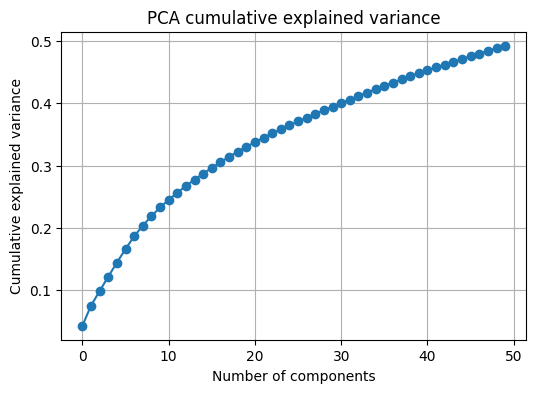

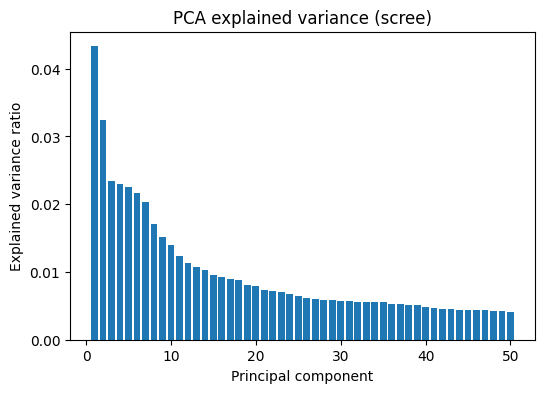

,Component,Explained Variance,Cumulative Explained Variance
0,1,0.043281,0.043281
1,2,0.032354,0.075635
2,3,0.023388,0.099023
3,4,0.023048,0.122071
4,5,0.022594,0.144664
5,6,0.021677,0.166341
6,7,0.020373,0.186715
7,8,0.017140,0.203854
8,9,0.015184,0.219039
9,10,0.013916,0.232955


Saved featured dataset to data/features.npz


In [ ]:
# Step 2: Feature Engineering
import pandas as pd
df = pd.read_csv('data/cleaned_labeled_data.csv')

import os
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare target
y = df['class'].astype(int)

# TF-IDF
vectorizer = TfidfVectorizer(max_features=2000, ngram_range=(1,2), stop_words='english')
X_tfidf = vectorizer.fit_transform(df['tweet'].astype(str))
print('TF-IDF shape:', X_tfidf.shape)

# Select top-K TF-IDF features by chi2
k = 500 if X_tfidf.shape[1] > 500 else X_tfidf.shape[1]
selector = SelectKBest(chi2, k=k)
X_selected = selector.fit_transform(X_tfidf, y)
print('Selected TF-IDF shape:', X_selected.shape)

# Convert selected sparse to dense for PCA
X_dense = X_selected.toarray()

# Optionally include scaled numeric features
num_cols = df.select_dtypes(include=[np.number]).columns.drop(['class'], errors='ignore')
if len(num_cols) > 0:
    X_num = df[num_cols].values
    # Concatenate numeric with text features
    X_combined = np.hstack([X_dense, X_num])
else:
    X_combined = X_dense

# Outlier handling on numeric part (IQR cap) — only if numeric present
if len(num_cols) > 0:
    q1 = np.percentile(X_num, 25, axis=0)
    q3 = np.percentile(X_num, 75, axis=0)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    # Cap
    for i in range(X_num.shape[1]):
        X_combined[:, -X_num.shape[1] + i] = np.clip(X_combined[:, -X_num.shape[1] + i], lower[i], upper[i])

# PCA to reduce dimensionality
n_components = 50 if X_combined.shape[1] > 50 else X_combined.shape[1]
pca = PCA(n_components=n_components, random_state=42)
X_pca = pca.fit_transform(X_combined)
print('PCA output shape:', X_pca.shape)

# PCA explained variance plot
explained = pca.explained_variance_ratio_
plt.figure(figsize=(6,4))
plt.plot(np.cumsum(explained), marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('PCA cumulative explained variance')
plt.grid(True)
plt.show()

# Scree plot
plt.figure(figsize=(6,4))
plt.bar(range(1, len(explained)+1), explained)
plt.xlabel('Principal component')
plt.ylabel('Explained variance ratio')
plt.title('PCA explained variance (scree)')
plt.show()

# Display PCA explained variance table
df_pca = pd.DataFrame({
    'Component': range(1, len(explained)+1),
    'Explained Variance': explained,
    'Cumulative Explained Variance': np.cumsum(explained)
})
display(df_pca)

# Final feature matrix
X = X_pca

# Save featured dataset (features + target) to data/features.npz
os.makedirs('data', exist_ok=True)
features_path = 'data/features.npz'
import numpy as _np
_np.savez_compressed(features_path, X=X, y=y.values)
print('Saved featured dataset to', features_path)

In [ ]:
# Save PCA table as JPEG
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Recreate df_pca (assuming pca is fitted in previous cell) Since pca is not in scope, refit or load
df = pd.read_csv('data/cleaned_labeled_data.csv')
y = df['class'].astype(int)
vectorizer = TfidfVectorizer(max_features=2000, ngram_range=(1,2), stop_words='english')
X_tfidf = vectorizer.fit_transform(df['tweet'].astype(str))
selector = SelectKBest(chi2, k=500)
X_selected = selector.fit_transform(X_tfidf, y)
X_dense = X_selected.toarray()
pca = PCA(n_components=50, random_state=42)
X_pca = pca.fit_transform(X_dense)
explained = pca.explained_variance_ratio_
df_pca = pd.DataFrame({
    'Component': range(1, len(explained)+1),
    'Explained Variance': explained,
    'Cumulative Explained Variance': np.cumsum(explained)
})

os.makedirs('report', exist_ok=True)
fig, ax = plt.subplots(figsize=(8,6))
ax.axis('off')
table_data = df_pca.round(4).values
table = ax.table(cellText=table_data, colLabels=df_pca.columns, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)
plt.title('PCA Explained Variance Table', fontsize=12, pad=20)
plt.savefig('report/pca_explained_variance_table.jpeg', bbox_inches='tight', dpi=300)
plt.close()
print('Saved PCA table to report/pca_explained_variance_table.jpeg')

Saved PCA table to report/pca_explained_variance_table.jpeg


Train/test shapes: (19826, 50) (4957, 50)

Training LogisticRegression...
LogisticRegression CV f1_macro: 0.616 ± 0.005

Training RandomForest...
RandomForest CV f1_macro: 0.651 ± 0.009

Training SVM...
SVM CV f1_macro: 0.567 ± 0.004

Models trained and stored in `models` dict


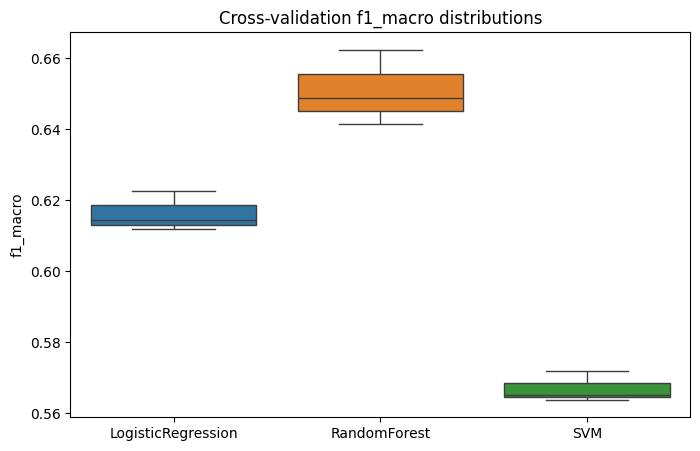

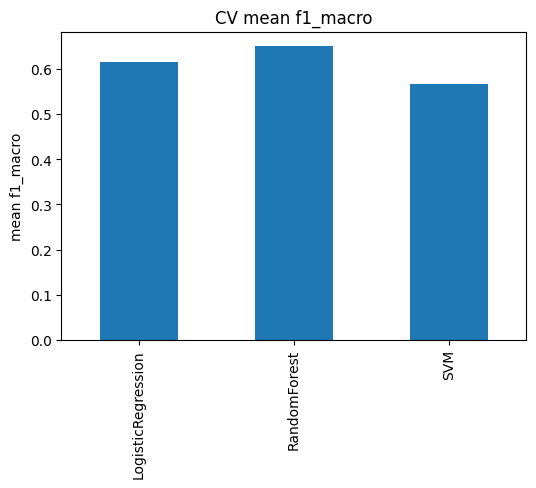

In [6]:
# Step 3: Model Selection & Training
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print('Train/test shapes:', X_train.shape, X_test.shape)

# Define models
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='linear', probability=True, random_state=42)
}

# Train and cross-validate briefly
cv_results = {}
for name, model in models.items():
    print(f'\nTraining {name}...')
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring='f1_macro')
    cv_results[name] = scores
    print(f'{name} CV f1_macro: {scores.mean():.3f} ± {scores.std():.3f}')
    model.fit(X_train, y_train)
    models[name] = model

print('\nModels trained and stored in `models` dict')

# Visualize CV distributions
cv_df = pd.DataFrame(cv_results)
plt.figure(figsize=(8,5))
sns.boxplot(data=cv_df)
plt.title('Cross-validation f1_macro distributions')
plt.ylabel('f1_macro')
plt.show()

# Show CV means as bar
plt.figure(figsize=(6,4))
cv_df.mean().plot(kind='bar')
plt.title('CV mean f1_macro')
plt.ylabel('mean f1_macro')
plt.show()


RandomForest best params: {'max_depth': None, 'n_estimators': 200}
RandomForest best score: 0.6552722203640416
RandomForest GridSearch Results Table:
param_n_estimators       100       200
param_max_depth                       
20                  0.654822  0.654595
Saved RandomForest table to report/randomforest_gridsearch_table.jpeg


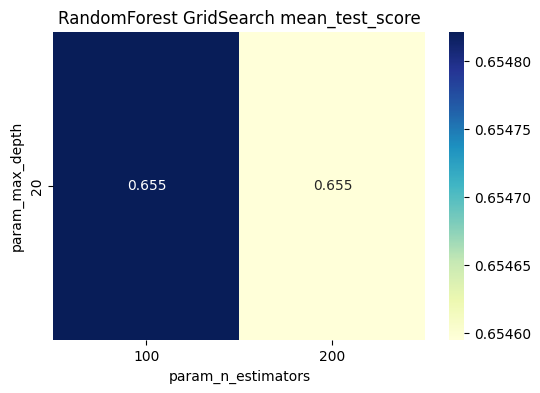

LogisticRegression best params: {'C': 10}
LogisticRegression best score: 0.6356648138645222
LogisticRegression GridSearch Results Table:
param_C
0.01     0.300498
0.10     0.506760
1.00     0.616284
10.00    0.635665
Name: mean_test_score, dtype: float64
Saved LogisticRegression table to report/logisticregression_gridsearch_table.jpeg


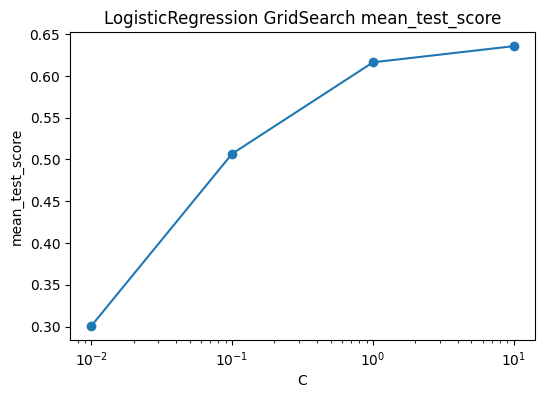

In [ ]:
# Step 4: Hyperparameter Tuning (GridSearchCV)
from sklearn.model_selection import GridSearchCV
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tune RandomForest (example)
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 20],
}
rf = RandomForestClassifier(random_state=42)
gr_rf = GridSearchCV(rf, rf_params, cv=3, scoring='f1_macro', n_jobs=-1)
gr_rf.fit(X_train, y_train)
print('RandomForest best params:', gr_rf.best_params_)
print('RandomForest best score:', gr_rf.best_score_)

# Plot RF grid results (heatmap over max_depth x n_estimators)
try:
    rf_cv = pd.DataFrame(gr_rf.cv_results_)
    rf_pivot = rf_cv.pivot_table(values='mean_test_score', index='param_max_depth', columns='param_n_estimators')
    print('RandomForest GridSearch Results Table:')
    print(rf_pivot)
    # Save table as JPEG
    import os
    os.makedirs('report', exist_ok=True)
    fig, ax = plt.subplots(figsize=(6,4))
    ax.axis('off')
    table = ax.table(cellText=rf_pivot.round(3).values, colLabels=rf_pivot.columns, rowLabels=rf_pivot.index, loc='center', cellLoc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.2)
    plt.title('RandomForest GridSearch Results Table', fontsize=12, pad=20)
    plt.savefig('report/randomforest_gridsearch_table.jpeg', bbox_inches='tight', dpi=300)
    plt.close()
    print('Saved RandomForest table to report/randomforest_gridsearch_table.jpeg')
    plt.figure(figsize=(6,4))
    sns.heatmap(rf_pivot.astype(float), annot=True, fmt='.3f', cmap='YlGnBu')
    plt.title('RandomForest GridSearch mean_test_score')
    plt.show()
except Exception:
    pass

# Tune LogisticRegression
lr_params = {'C': [0.01, 0.1, 1, 10]}
lr = LogisticRegression(max_iter=1000, random_state=42)
gr_lr = GridSearchCV(lr, lr_params, cv=3, scoring='f1_macro', n_jobs=-1)
gr_lr.fit(X_train, y_train)
print('LogisticRegression best params:', gr_lr.best_params_)
print('LogisticRegression best score:', gr_lr.best_score_)

# Plot LR grid (C vs mean_test_score)
try:
    lr_cv = pd.DataFrame(gr_lr.cv_results_)
    lr_means = lr_cv.groupby('param_C')['mean_test_score'].mean().sort_index()
    print('LogisticRegression GridSearch Results Table:')
    print(lr_means)
    # Save table as JPEG
    fig, ax = plt.subplots(figsize=(6,4))
    ax.axis('off')
    table_data = lr_means.round(3).reset_index().values
    table = ax.table(cellText=table_data, colLabels=['C', 'Mean Test Score'], loc='center', cellLoc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.2)
    plt.title('LogisticRegression GridSearch Results Table', fontsize=12, pad=20)
    plt.savefig('report/logisticregression_gridsearch_table.jpeg', bbox_inches='tight', dpi=300)
    plt.close()
    print('Saved LogisticRegression table to report/logisticregression_gridsearch_table.jpeg')
    plt.figure(figsize=(6,4))
    lr_means.plot(marker='o')
    plt.xscale('log')
    plt.xlabel('C')
    plt.ylabel('mean_test_score')
    plt.title('LogisticRegression GridSearch mean_test_score')
    plt.show()
except Exception:
    pass

# Choose best estimators
best_estimators = {
    'RandomForest': gr_rf.best_estimator_,
    'LogisticRegression': gr_lr.best_estimator_,
}

best_estimators['SVM'] = models['SVM']


                    accuracy  precision    recall        f1  log_loss  \
RandomForest        0.885415   0.725865  0.641283  0.655588  0.419701   
LogisticRegression  0.870083   0.719740  0.608056  0.621487  0.327887   
SVM                 0.874117   0.545141  0.595328  0.568729  0.369718   

                     roc_auc  
RandomForest        0.883216  
LogisticRegression  0.881942  
SVM                 0.843166  
Saved model evaluation comparison table to report/model_evaluation_comparison_table.jpeg
Best model by f1: RandomForest


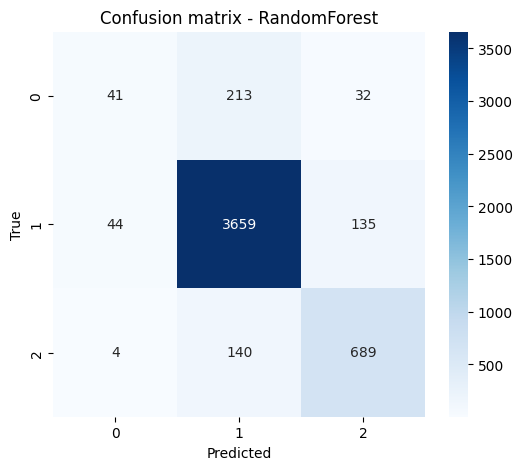

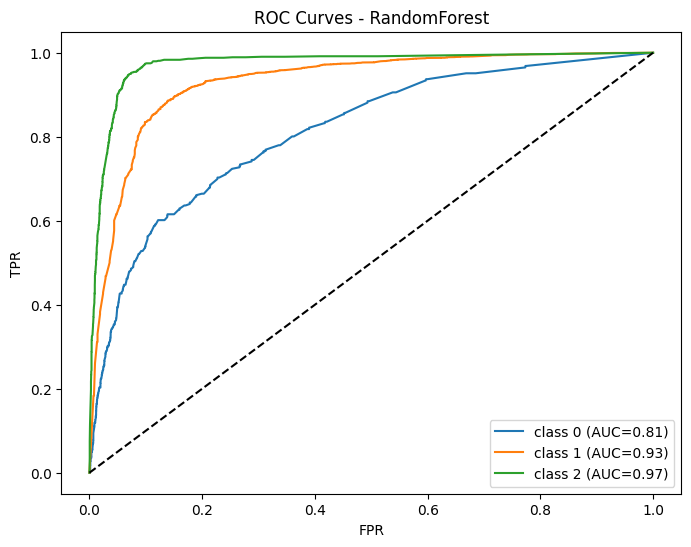

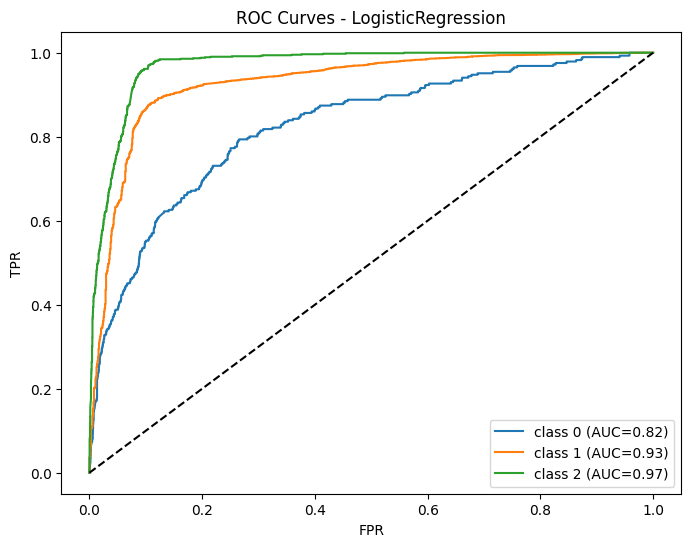

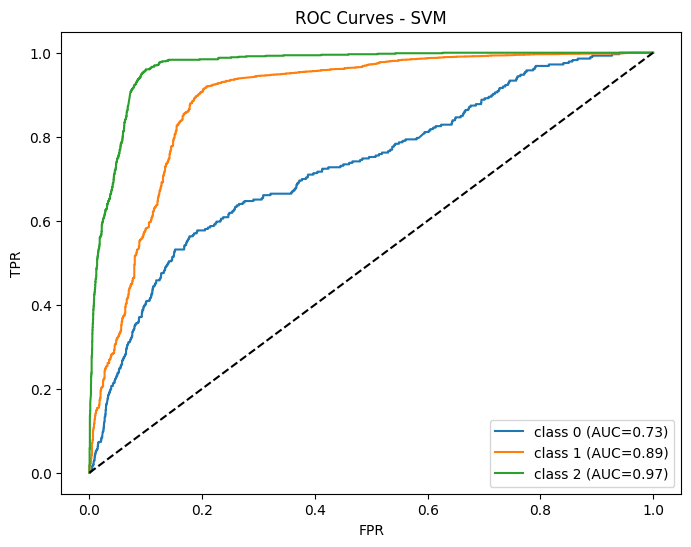

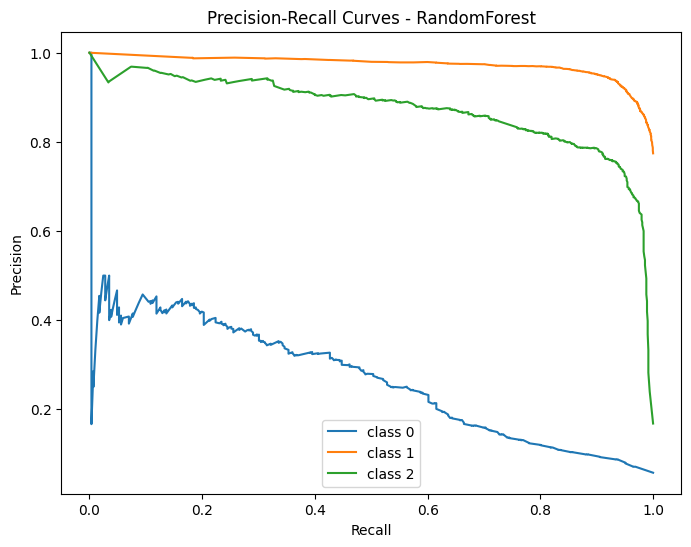

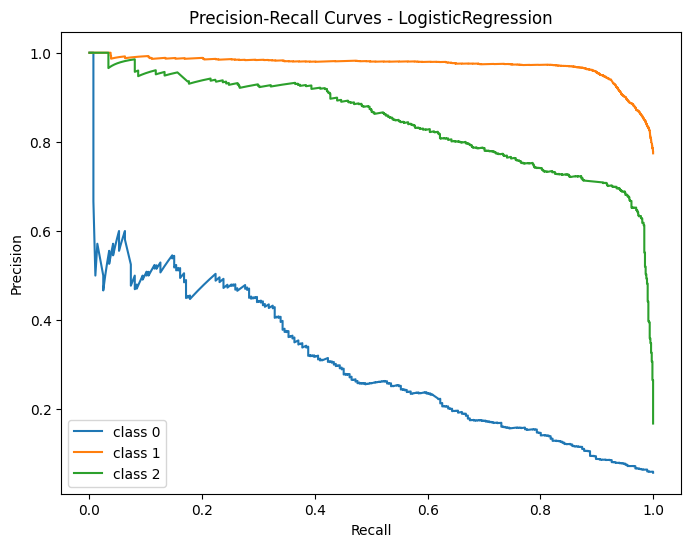

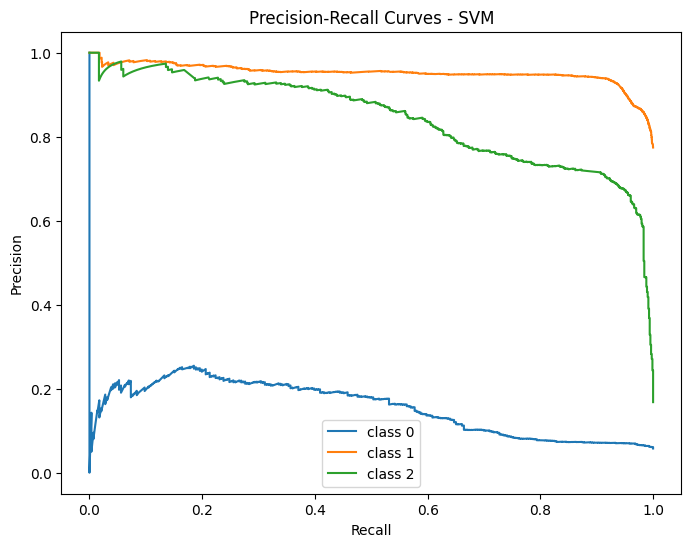

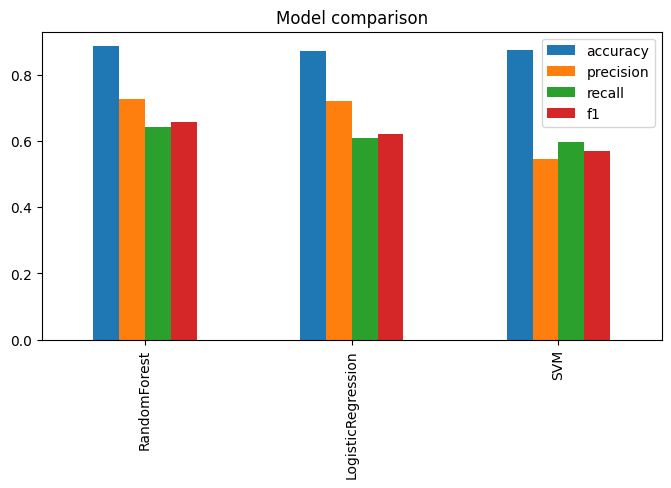

In [18]:
# Step 5: Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, log_loss, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

results = {}
classes = sorted(y.unique())
y_test_bin = label_binarize(y_test, classes=classes)

for name, est in best_estimators.items():
    y_pred = est.predict(X_test)
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, average='macro', zero_division=0),
        'recall': recall_score(y_test, y_pred, average='macro', zero_division=0),
        'f1': f1_score(y_test, y_pred, average='macro', zero_division=0),
        'log_loss': None,
        'roc_auc': None
    }
    # log loss if predict_proba available
    if hasattr(est, 'predict_proba'):
        probs = est.predict_proba(X_test)
        try:
            metrics['log_loss'] = log_loss(y_test, probs)
        except Exception:
            metrics['log_loss'] = None
        try:
            metrics['roc_auc'] = roc_auc_score(y_test, probs, average='macro', multi_class='ovo')
        except Exception:
            metrics['roc_auc'] = None
    results[name] = metrics

# Show table of metrics
import pandas as pd
res_df = pd.DataFrame(results).T
print(res_df)

# Save comparison table as JPEG
import os
os.makedirs('report', exist_ok=True)
fig, ax = plt.subplots(figsize=(10,6))
ax.axis('off')
table_data = res_df.round(4).values
table = ax.table(cellText=table_data, colLabels=res_df.columns, rowLabels=res_df.index, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)
plt.title('Model Evaluation Comparison Table', fontsize=12, pad=20)
plt.savefig('report/model_evaluation_comparison_table.jpeg', bbox_inches='tight', dpi=300)
plt.close()
print('Saved model evaluation comparison table to report/model_evaluation_comparison_table.jpeg')

# Confusion matrix for best model by f1
best_name = res_df['f1'].idxmax()
print('Best model by f1:', best_name)
best = best_estimators[best_name]
cm = confusion_matrix(y_test, best.predict(X_test))
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion matrix - {best_name}')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ROC curves for each model (if probabilities available)
for name, est in best_estimators.items():
    if hasattr(est, 'predict_proba'):
        probs = est.predict_proba(X_test)
        plt.figure(figsize=(8,6))
        for i, cls in enumerate(classes):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], probs[:, i])
            auc_score = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'class {cls} (AUC={auc_score:.2f})')
        plt.plot([0,1],[0,1],'k--')
        plt.xlabel('FPR')
        plt.ylabel('TPR')
        plt.title(f'ROC Curves - {name}')
        plt.legend()
        plt.show()

# Precision-Recall curves for each model
for name, est in best_estimators.items():
    if hasattr(est, 'predict_proba'):
        probs = est.predict_proba(X_test)
        plt.figure(figsize=(8,6))
        for i, cls in enumerate(classes):
            precision, recall, _ = precision_recall_curve(y_test_bin[:, i], probs[:, i])
            plt.plot(recall, precision, label=f'class {cls}')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'Precision-Recall Curves - {name}')
        plt.legend()
        plt.show()

# Bar chart of metrics
res_df[['accuracy','precision','recall','f1']].plot(kind='bar', figsize=(8,4))
plt.title('Model comparison')
plt.show()

In [ ]:
# Step 6: Save / Load model and Predict on new sample
import joblib

# Save best model (by f1)
model_path = 'model/best_model.joblib'
import os
os.makedirs('model', exist_ok=True)
joblib.dump(best, model_path)
print('Saved best model to', model_path)

# Load and predict
loaded = joblib.load(model_path)
sample = ["I hate you and everything you stand for"]
# transform sample using vectorizer+selector+pca pipeline steps
Xs = vectorizer.transform(sample)
Xs = selector.transform(Xs).toarray()
if len(num_cols) > 0:
    # add zeros for numeric features
    Xs = np.hstack([Xs, np.zeros((1, len(num_cols)))])
Xs_pca = pca.transform(Xs)
pred = loaded.predict(Xs_pca)
print('Sample prediction (class):', pred)


Saved best model to model/best_model.joblib
Sample prediction (class): [1]


In [19]:
# Deployment Workflow Illustration
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_xlim(0, 12)
ax.set_ylim(0, 6)
ax.axis('off')

# Boxes
boxes = [
    (1, 4, 'Raw Text Input'),
    (4, 4, 'Preprocessing\n(Cleaning, Tokenization)'),
    (7, 4, 'Feature Extraction\n(TF-IDF + PCA)'),
    (10, 4, 'Model Prediction'),
    (10, 1, 'Predicted Class Label\n+ Confidence Score')
]

for x, y, text in boxes:
    rect = patches.FancyBboxPatch((x-0.8, y-0.3), 1.6, 0.6, boxstyle="round,pad=0.1", edgecolor='black', facecolor='lightblue')
    ax.add_patch(rect)
    ax.text(x, y, text, ha='center', va='center', fontsize=10)

# Arrows
arrows = [
    (2.2, 4, 4.8, 4),
    (5.2, 4, 7.8, 4),
    (8.2, 4, 9.8, 4),
    (10, 3.7, 10, 1.3)
]

for x1, y1, x2, y2 in arrows:
    ax.arrow(x1, y1, x2-x1, y2-y1, head_width=0.1, head_length=0.1, fc='black', ec='black')

plt.title('Deployment Prediction Workflow', fontsize=14, pad=20)
plt.savefig('report/deployment_workflow.jpeg', bbox_inches='tight', dpi=300)
plt.close()
print('Saved deployment workflow to report/deployment_workflow.jpeg')

Saved deployment workflow to report/deployment_workflow.jpeg


In [20]:
# Example Predictions Table
import pandas as pd
import numpy as np

# Load model and transformers
loaded = joblib.load('model/best_model.joblib')

# Example unseen texts
examples = [
    "I hate you and everything you stand for",
    "This is a great day!",
    "You are an idiot and should shut up",
    "Love this new movie, highly recommend",
    "Kill all the immigrants now",
    "Happy birthday to my best friend!"
]

predictions = []
for text in examples:
    Xs = vectorizer.transform([text])
    Xs = selector.transform(Xs).toarray()
    Xs_pca = pca.transform(Xs)
    pred_class = loaded.predict(Xs_pca)[0]
    probs = loaded.predict_proba(Xs_pca)[0]
    confidence = np.max(probs)
    predictions.append({
        'Text': text[:50] + '...' if len(text) > 50 else text,
        'Predicted Class': pred_class,
        'Confidence': f'{confidence:.3f}',
        'Probabilities': ', '.join([f'{p:.3f}' for p in probs])
    })

pred_df = pd.DataFrame(predictions)
print('Example Predictions Table:')
print(pred_df)

# Save table as JPEG
fig, ax = plt.subplots(figsize=(12, 8))
ax.axis('off')
table_data = pred_df.values
col_labels = pred_df.columns
row_labels = [f'Ex {i+1}' for i in range(len(pred_df))]
table = ax.table(cellText=table_data, colLabels=col_labels, rowLabels=row_labels, loc='center', cellLoc='left')
table.auto_set_font_size(False)
table.set_fontsize(8)
table.scale(1.2, 1.2)
plt.title('Example Predictions on Unseen Text', fontsize=12, pad=20)
plt.savefig('report/example_predictions_table.jpeg', bbox_inches='tight', dpi=300)
plt.close()
print('Saved example predictions table to report/example_predictions_table.jpeg')

Example Predictions Table:
                                      Text  Predicted Class Confidence  \
0  I hate you and everything you stand for                1      0.458   
1                     This is a great day!                2      0.695   
2      You are an idiot and should shut up                1      0.790   
3    Love this new movie, highly recommend                2      0.860   
4              Kill all the immigrants now                1      0.398   
5        Happy birthday to my best friend!                2      0.672   

         Probabilities  
0  0.307, 0.458, 0.235  
1  0.040, 0.265, 0.695  
2  0.165, 0.790, 0.045  
3  0.045, 0.095, 0.860  
4  0.390, 0.398, 0.212  
5  0.116, 0.211, 0.672  
Saved example predictions table to report/example_predictions_table.jpeg
